<a href="https://colab.research.google.com/github/Poohi5/AlternusVera/blob/master/AlternusVera_Part1_Title_vs_Body_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Importing Kaggle Fake news dataset

In [0]:
kaggleFilepath = base_dir + '/Alternus_vera/fake.csv'


In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Kaggle Fakenews dataset

In [0]:
df_kaggle = pd.read_csv(kaggleFilepath)

In [0]:
df_kaggle.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [0]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

Checking nulls

In [0]:
df_kaggle.columns[df_kaggle.isna().any()].tolist()

['author',
 'title',
 'text',
 'country',
 'domain_rank',
 'thread_title',
 'main_img_url']

checking datatypes

In [0]:
df_kaggle.dtypes

uuid                   object
ord_in_thread           int64
author                 object
published              object
title                  object
text                   object
language               object
crawled                object
site_url               object
country                object
domain_rank           float64
thread_title           object
spam_score            float64
main_img_url           object
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                   object
dtype: object

In [0]:
df_kaggle.language.unique()

array(['english', 'ignore', 'german', 'french', 'spanish', 'russian',
       'greek', 'finnish', 'portuguese', 'arabic', 'dutch', 'italian',
       'turkish', 'norwegian', 'chinese', 'polish'], dtype=object)

Getting only the English articles

In [0]:

# Getting only english articles
df_kaggle = df_kaggle[df_kaggle['language'] == 'english']

In [0]:
df_kaggle.language.unique()

array(['english'], dtype=object)

In [0]:
df_kaggle.text.values

array(['Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? \nHere we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! \nWe’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related',
       'Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest! \n100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over paym

In [0]:
import re

Replcaing nulls in title and body wit Dummy title and body

In [0]:
# Replacing empty articles with "Dummy_text and Dummy_Title"
wrong_text = []
wrong_title = []
for idx, item in enumerate(df_kaggle.text):
    
    try:
        df_kaggle.text[idx] = re.sub('[^\x00-\x7F]+', "", item)
    except:
        df_kaggle.text[idx] = 'Dummy_Text'
        wrong_text.append((idx,item))
    
    if idx%500 == 0:
        print('The ',idx,'th item')
        
        
for idx,item in enumerate(df_kaggle.title):
    
    try:
        df_kaggle.title[idx] = re.sub('[^\x00-\x7F]+', "", item)
    except:
        df_kaggle.title[idx] = 'Dummy_Title'
        wrong_title.append((idx,item))
    if idx%500 == 0:
        print('The',idx,'th item')

The  0 th item
The  500 th item


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The  1000 th item
The  1500 th item
The  2000 th item
The  2500 th item
The  3000 th item
The  3500 th item
The  4000 th item
The  4500 th item
The  5000 th item
The  5500 th item
The  6000 th item
The  6500 th item
The  7000 th item
The  7500 th item
The  8000 th item
The  8500 th item
The  9000 th item
The  9500 th item
The  10000 th item
The  10500 th item
The  11000 th item
The  11500 th item
The  12000 th item
The 0 th item


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The 500 th item
The 1000 th item
The 1500 th item
The 2000 th item
The 2500 th item
The 3000 th item
The 3500 th item
The 4000 th item
The 4500 th item
The 5000 th item
The 5500 th item
The 6000 th item
The 6500 th item
The 7000 th item
The 7500 th item
The 8000 th item
The 8500 th item
The 9000 th item
The 9500 th item
The 10000 th item
The 10500 th item
The 11000 th item
The 11500 th item
The 12000 th item


In [0]:
slash_text = []
slash_title = []
for idx, item in enumerate(df_kaggle.text):
    
    try:
        df_kaggle.text[idx] = re.sub('(\\n)',"",item)
    except:
        df_kaggle.text[idx] = 'Dummy_Text'
        wrong_text.append((idx,item))
    
    if idx%500 == 0:
        print('The',idx,'th item')
        
        
for idx, item in enumerate(df_kaggle.title):
    
    try:
        df_kaggle.title[idx] = re.sub('(\\n)',"",item)

    except:
        df_kaggle.title[idx] = 'Dummy_Title'
        wrong_title.append((idx,item))
    if idx%500 == 0:
        print('The',idx,'th item')

The 0 th item
The 500 th item
The 1000 th item
The 1500 th item
The 2000 th item
The 2500 th item
The 3000 th item
The 3500 th item
The 4000 th item
The 4500 th item
The 5000 th item
The 5500 th item
The 6000 th item
The 6500 th item
The 7000 th item
The 7500 th item
The 8000 th item
The 8500 th item
The 9000 th item
The 9500 th item
The 10000 th item
The 10500 th item
The 11000 th item
The 11500 th item
The 12000 th item
The 12500 th item
The 0 th item
The 500 th item
The 1000 th item
The 1500 th item
The 2000 th item
The 2500 th item
The 3000 th item
The 3500 th item
The 4000 th item
The 4500 th item
The 5000 th item
The 5500 th item
The 6000 th item
The 6500 th item
The 7000 th item
The 7500 th item
The 8000 th item
The 8500 th item
The 9000 th item
The 9500 th item
The 10000 th item
The 10500 th item
The 11000 th item
The 11500 th item
The 12000 th item
The 12500 th item


Adding the Label column as 'Fakeness'

In [0]:
df_kaggle['fakeness'] = 1

In [0]:
df_kaggle.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,fakeness
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Govt Be...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,1
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,1


##Liar-Liar Dataset

In [0]:
liarFilepath = base_dir + '/Alternus_vera/liar_dataset/Liardataset.csv'

In [0]:
df_liar = pd.read_csv(liarFilepath, encoding= 'unicode_escape')

In [0]:
df_liar.head()

,json,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


Simplifying the Labels for liar-liar dataset

In [0]:
true_labels = ['true','mostly-true','half-true']
false_labels = ['barely-true','false','pants-fire']
def label(input_label):
    if input_label in true_labels:
        return 0 #real news
    else:
        return 1 #fake news

In [0]:
fakeness = 'fakeness' #adding label column

df_liar[fakeness] = df_liar.apply(lambda row: label(row['class']), axis=1)

In [0]:
df_liar.head()

,json,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,fakeness
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,0
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,0
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,0


##NewsCategory dataset

In [0]:
newscategoryFilepath = liarFilepath = base_dir + '/Alternus_vera/News_Category.csv'

In [0]:
df_newscat = pd.read_csv(newscategoryFilepath)

In [0]:
df_newscat.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,5/26/18
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,5/26/18
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,5/26/18
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,5/26/18
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",5/26/18


In [0]:
df_newscat.dtypes

category             object
headline             object
authors              object
link                 object
short_description    object
date                 object
dtype: object

In [0]:
df_newscat['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

Filtering rows to only get Politics related Dataset

In [0]:
df_newscat = df_newscat.loc[df_newscat['category'] == 'POLITICS']

In [0]:
df_newscat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32739 entries, 13 to 124984
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           32739 non-null  object
 1   headline           32738 non-null  object
 2   authors            29204 non-null  object
 3   link               32739 non-null  object
 4   short_description  29578 non-null  object
 5   date               32739 non-null  object
dtypes: object(6)
memory usage: 1.7+ MB


Added the Label column as 'Fakeness'

In [0]:
df_newscat['fakeness'] = 0

In [0]:
df_newscat.head()

,category,headline,authors,link,short_description,date,fakeness
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,0
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,0
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,0
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,5/26/18,0
17,POLITICS,Ireland Votes To Repeal Abortion Amendment In ...,Laura Bassett,https://www.huffingtonpost.com/entry/results-f...,Irish women will no longer have to travel to t...,5/26/18,0


In [0]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12403 entries, 0 to 12998
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12403 non-null  object 
 1   ord_in_thread       12403 non-null  int64  
 2   author              10194 non-null  object 
 3   published           12403 non-null  object 
 4   title               12073 non-null  object 
 5   text                12357 non-null  object 
 6   language            12403 non-null  object 
 7   crawled             12403 non-null  object 
 8   site_url            12403 non-null  object 
 9   country             12227 non-null  object 
 10  domain_rank         8228 non-null   float64
 11  thread_title        12391 non-null  object 
 12  spam_score          12403 non-null  float64
 13  main_img_url        8779 non-null   object 
 14  replies_count       12403 non-null  int64  
 15  participants_count  12403 non-null  int64  
 16  like

In [0]:
df_liar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   json                  12791 non-null  object 
 1   class                 12791 non-null  object 
 2   statement             12791 non-null  object 
 3   subject               12789 non-null  object 
 4   speaker               12789 non-null  object 
 5   speaker_job_title     9224 non-null   object 
 6   state_info            10042 non-null  object 
 7   party_affiliation     12789 non-null  object 
 8   barely_true_counts    12789 non-null  float64
 9   false_counts          12789 non-null  float64
 10  half_true_counts      12789 non-null  float64
 11  mostly_true_counts    12789 non-null  float64
 12  pants_on_fire_counts  12789 non-null  float64
 13  context               12660 non-null  object 
 14  fakeness              12791 non-null  int64  
dtypes: float64(5), int6

In [0]:
df_newscat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32739 entries, 13 to 124984
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           32739 non-null  object
 1   headline           32738 non-null  object
 2   authors            29204 non-null  object
 3   link               32739 non-null  object
 4   short_description  29578 non-null  object
 5   date               32739 non-null  object
 6   fakeness           32739 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


##Amalgamated Dataset
Code to amalgamate is in other notebook


In [0]:
df = pd.read_csv(base_dir + '/Alternus_vera/merged_data.csv', encoding = 'utf-8')

In [0]:
df.head()

,Unnamed: 0,authors,headline,short_description,link,domainrank,fakeness
0,0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Govt Be...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,1
1,1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,1
2,2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,1
3,3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,25689.0,1
4,4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,25689.0,1


Renaming the Columns for Simplicity

In [0]:
df = df.rename(columns={'headline':'title', 'short_description': 'body'})

NameError: ignored

In [0]:
df.head()

,Unnamed: 0,authors,title,body,link,domainrank,fakeness
0,0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Govt Be...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,1
1,1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,1
2,2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,1
3,3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,25689.0,1
4,4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,25689.0,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57933 entries, 0 to 57932
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  57933 non-null  int64  
 1   authors     52187 non-null  object 
 2   title       57600 non-null  object 
 3   body        54725 non-null  object 
 4   link        57802 non-null  object 
 5   domainrank  53758 non-null  float64
 6   fakeness    57933 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.1+ MB


In [0]:
df.drop(columns='Unnamed: 0')

,authors,title,body,link,domainrank,fakeness
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Govt Be...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,1
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,1
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,1
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,25689.0,1
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,25689.0,1
...,...,...,...,...,...,...
57928,"Al Eisele, ContributorEditor-at-Large, The Hill",Why Chris Christie Should NOT Be President,Apparently that's just the way they play polit...,https://www.huffingtonpost.com/entry/why-chris...,603.0,0
57929,"Earl Ofari Hutchinson, ContributorAuthor and p...",GOP's Old Ploy: Tag President Obama as the Rac...,The baiting and the assault on Obama will get ...,https://www.huffingtonpost.com/entry/gops-old-...,603.0,0
57930,Shadee Ashtari,Lawmakers Introduce Bill To Tackle Misleadingl...,NaN,https://www.huffingtonpost.com/entry/photoshop...,603.0,0
57931,"Robin Amos Kahn, ContributorWriter, Speaker, L...",Dear President Obama,"I'm assuming you are aware of this issue, Pres...",https://www.huffingtonpost.com/entry/dear-pres...,603.0,0


In [0]:
df.shape

(57933, 7)

In [0]:
df.columns[df.isna().any()].tolist()

['authors', 'title', 'body', 'link', 'domainrank']

In [0]:
df.dropna(inplace=True)

In [0]:
df.columns[df.isna().any()].tolist()

[]

In [0]:
df.shape

(45802, 7)

##Modeling

####Preparing the target and predictors for modeling

In [0]:
import pandas as pd
from collections import Counter
import re
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
X_body_text = df.body.values
X_title_text = df.title.values
y = df.fakeness.values

##TF_IDF for vectorizing the News Articles/dataset

In [0]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)

In [0]:
X_body_tfidf = tfidf.fit_transform(X_body_text)
X_title_tfidf = tfidf.fit_transform (X_title_text)

In [0]:
X_title_tfidf_train, X_title_tfidf_test, y_title_train, y_title_test = train_test_split(X_title_tfidf,y, test_size = 0.2, random_state=1234)
X_body_tfidf_train, X_body_tfidf_test, y_body_train, y_body_test = train_test_split(X_body_tfidf,y, test_size = 0.2, random_state=1234)

##Defining functions to see the Learning Curve of different classification algorithm

In [0]:
class cross_validation(object):
    '''This class provides cross validation of any data set , incrementally increasing number 
       of samples in the training and test set and performing KFold splits at every iteration. 
       During cross validation the metrics accuracy, recall, precision, and f1-score are recorded. 
       The results of the cross validation are display on four learning curves. '''
    
    def __init__(self, model, X_data, Y_data, X_test=None, Y_test=None, 
                 n_splits=3, init_chunk_size = 1000000, chunk_spacings = 100000, average = "binary"):

        self.X, self.Y =  shuffle(X_data, Y_data, random_state=1234)
        
        
        self.model = model
        self.n_splits = n_splits
        self.chunk_size = init_chunk_size
        self.chunk_spacings = chunk_spacings        
        
        self.X_train = []
        self.X_test = []
        self.Y_train = []
        self.Y_test = []
        self.X_holdout = []
        self.Y_holdout = []
        
        self.f1_train = []
        self.f1_test = []
        self.acc_train = []
        self.acc_test = []
        self.pre_train = []
        self.pre_test = []
        self.rec_train = []
        self.rec_test = []
        
        self.f1_mean_train = []
        self.f1_mean_test = []
        self.acc_mean_train = []
        self.acc_mean_test = []
        self.pre_mean_train = []
        self.pre_mean_test = []
        self.rec_mean_train = []
        self.rec_mean_test = []
        
        self.training_size = []
        self.averageType = average
    
    def make_chunks(self):
        '''Partitions data into chunks for incremental cross validation'''
        
        # get total number of points
        self.N_total = self.X.shape[0]
        # partition data into chunks for learning
        self.chunks = list(np.arange(self.chunk_size, self.N_total, self.chunk_spacings ))
        self.remainder = self.X.shape[0] - self.chunks[-1]
        self.chunks.append( self.chunks[-1] + self.remainder )



    def train_for_learning_curve(self):
        '''KFold cross validates model and records metric scores for learning curves. 
           Metrics scored are f1-score, precision, recall, and accuracy'''

        # partiton data into chunks 
        self.make_chunks()
        # for each iteration, allow the model to use 10 more samples in the training set 
        self.skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=1234)
        # iterate through the first n samples
        for n_points in self.chunks: 
            
        
            # split the first n samples in k folds 
            for train_index, test_index in self.skf.split(self.X[:n_points], self.Y[:n_points]):
                self.train_index, self.test_index = train_index, test_index                
                self.X_train = self.X[self.train_index]
                self.X_test = self.X[self.test_index]
                self.Y_train = self.Y[self.train_index]
                self.Y_test = self.Y[self.test_index]
                
                self.model.fit(self.X_train, self.Y_train)
                self.y_pred_train = self.model.predict(self.X_train)
                self.y_pred_test = self.model.predict(self.X_test)
                self.log_metric_scores_()   
                
            self.log_metric_score_means_()
            self.training_size.append(n_points)
        
    def validate_for_holdout_set(self, X_holdout, Y_holdout):
        
        
        self.X_test = X_holdout
        self.Y_test = Y_holdout
        
        # partiton data into chunks 
        self.make_chunks()
        
        for n_points in self.chunks:
            
            self.X_train = self.X[:n_points]
            self.Y_train = self.Y[:n_points]

            self.model.fit(self.X_train, self.Y_train)
            self.y_pred_train = self.model.predict(self.X_train)
            self.y_pred_test = self.model.predict(self.X_test)
            self.log_metric_scores_()   

            self.log_metric_score_means_()
            self.training_size.append(n_points)
            
            
    
                            
    def log_metric_score_means_(self):
        '''Recrods the mean of the four metrics recording during training'''
        self.f1_mean_train.append(np.sum(self.f1_train)/len(self.f1_train))
        self.f1_mean_test.append(np.sum(self.f1_test)/len(self.f1_test))
        
        self.acc_mean_train.append(np.sum(self.acc_train)/len(self.acc_train))
        self.acc_mean_test.append(np.sum(self.acc_test)/len(self.acc_test))
        
        self.pre_mean_train.append(np.sum(self.pre_train)/len(self.pre_train))
        self.pre_mean_test.append(np.sum(self.pre_test)/len(self.pre_test))
        
        self.rec_mean_train.append(np.sum(self.rec_train)/len(self.rec_train))
        self.rec_mean_test.append(np.sum(self.rec_test)/len(self.rec_test))
        
        self.reinitialize_metric_lists_()
            
            
    def reinitialize_metric_lists_(self):
        '''Reinitializes metrics lists for training'''
        self.f1_train = []
        self.f1_test = []
        self.acc_train = []
        self.acc_test = []
        self.pre_train = []
        self.pre_test = []
        self.rec_train = []
        self.rec_test = []

            
    def log_metric_scores_(self):
        '''Records the metric scores during each training iteration'''
        self.f1_train.append(f1_score(self.Y_train, self.y_pred_train, average=self.averageType))
        self.acc_train.append(accuracy_score( self.Y_train, self.y_pred_train) )

        self.pre_train.append(precision_score(self.Y_train, self.y_pred_train, average=self.averageType))
        self.rec_train.append(recall_score( self.Y_train, self.y_pred_train, average=self.averageType) )

        self.f1_test.append(f1_score(self.Y_test, self.y_pred_test, average=self.averageType))
        self.acc_test.append(accuracy_score(self.Y_test, self.y_pred_test))

        self.pre_test.append(precision_score(self.Y_test, self.y_pred_test, average=self.averageType))
        self.rec_test.append(recall_score(self.Y_test, self.y_pred_test,average=self.averageType))
            

    def plot_learning_curve(self):
        '''Plots f1 and accuracy learning curves for a given model and data set'''
        
        fig = plt.figure(figsize = (17,12))
        # plot f1 score learning curve
        fig.add_subplot(221)   # left
        plt.title("F1-Score vs. Number of Training Samples")
        plt.plot(self.training_size, self.f1_mean_train, label="Train")
        plt.plot(self.training_size, self.f1_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("F1-Score")
        plt.legend(loc=4);
        
        # plot accuracy learning curve
        fig.add_subplot(222)   # right 
        plt.title("Accuracy vs. Number of Training Samples")
        plt.plot(self.training_size, self.acc_mean_train, label="Train")
        plt.plot(self.training_size, self.acc_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Accuracy")
        plt.legend(loc=4);
        
        # plot precision learning curve
        fig.add_subplot(223)   # left
        plt.title("Precision Score vs. Number of Training Samples")
        plt.plot(self.training_size, self.pre_mean_train, label="Train")
        plt.plot(self.training_size, self.pre_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Precision")
        plt.ylim(min(self.pre_mean_test), max(self.pre_mean_train) + 0.05)
        plt.legend(loc=4);
        
        # plot accuracy learning curve
        fig.add_subplot(224)   # right 
        plt.title("Recall vs. Number of Training Samples")
        plt.plot(self.training_size, self.rec_mean_train, label="Train")
        plt.plot(self.training_size, self.rec_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Recall")
        plt.legend(loc=4);

##Below we can see training the model with different classification algorithms and their respective learning curves to see how 'Title'and 'Body' can be helpful in classifying the news as Fake or Real

###Logistic Regression

####Using the Title 

In [0]:
lr_title = LogisticRegression(penalty='l2')

Training and Predicting the Model

In [0]:
# train model
lr_title.fit(X_title_tfidf_train, y_title_train)

# get predictions for article section
y_title_pred = lr_title.predict(X_title_tfidf_test)

Lets see the metrics

In [0]:
print ("Logistig Regression F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_title_test, y_title_pred, average='macro')*100 ) )
print ( "Accuracy {:.4}%".format(accuracy_score(y_title_test, y_title_pred)*100) )

Logistig Regression F1 and Accuracy Scores : 

F1 score 64.08%
Accuracy 73.13%


Cross-Validation Score

In [0]:
cros_val_list = cross_val_score(lr_title, X_title_tfidf,y,cv=7)
print (cros_val_list)

[0.15709046 0.68149167 0.71221152 0.79810484 0.75317133 0.77624943
 0.78587804]


In [0]:
print(cros_val_list.mean())

0.6663138994680347


Lets see the Learning curve for Title of the dataset for logistic regression

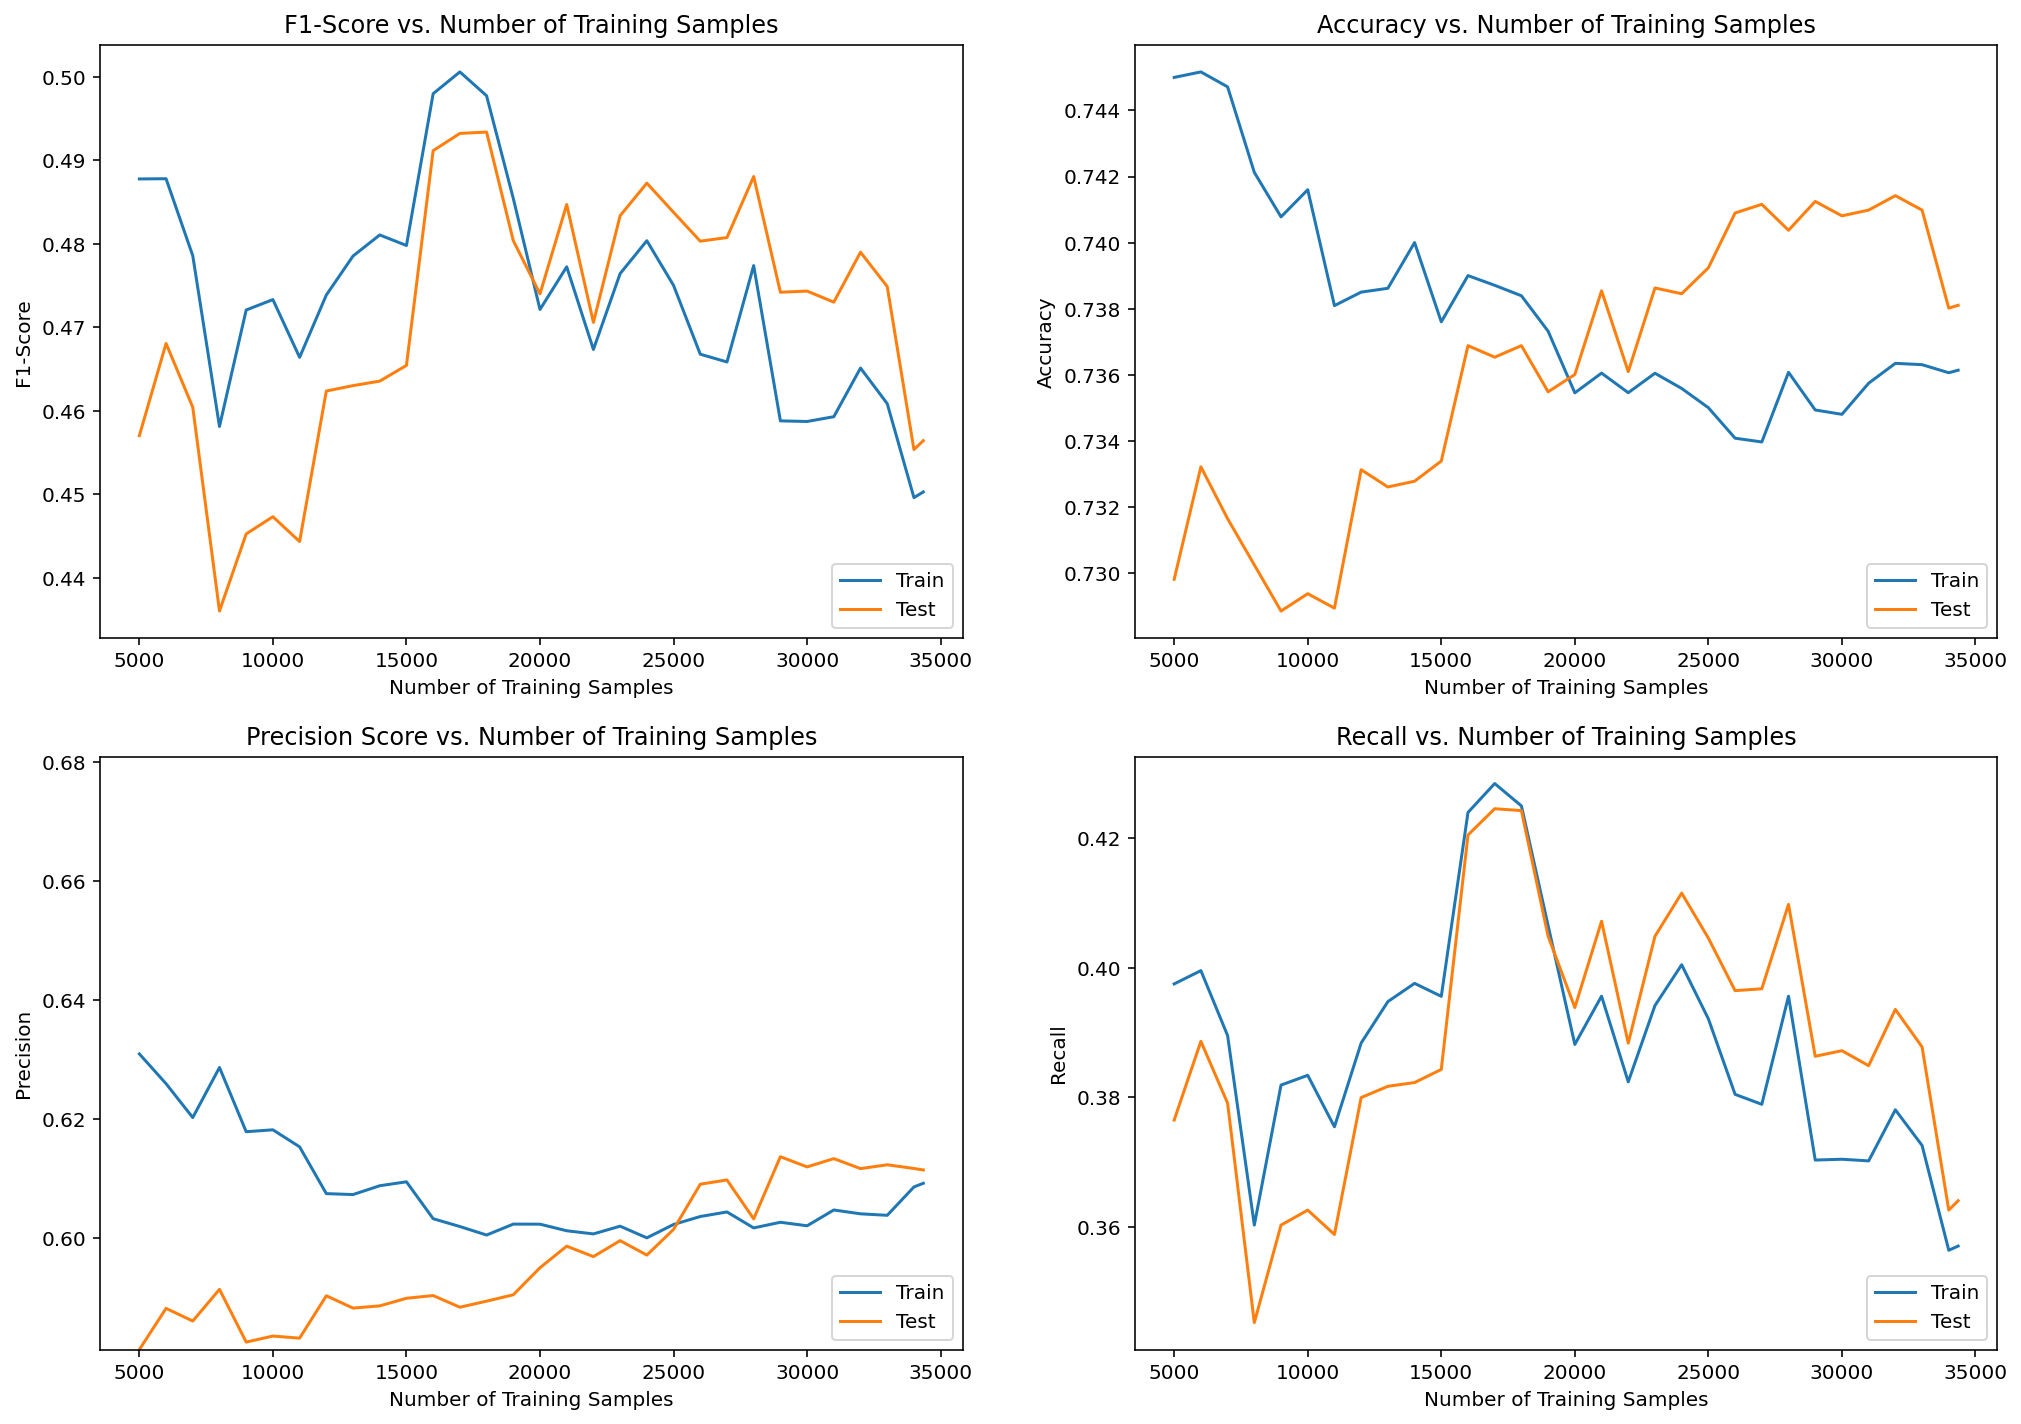

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(X_title_tfidf,y)

cv = cross_validation(lr_title, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

**Graphs above** show that the difference train and test curves are some what acceptable, and using the "Title" of the dataset can be helpful to some extend

####Using the Body of the dataset

In [0]:
lr_body = LogisticRegression(penalty='l2')

In [0]:
lr_body.fit(X_body_tfidf_train, y_body_train)

# get predictions for article section
y_body_pred = lr_body.predict(X_body_tfidf_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
print ("Logistig Regression F1 and Accuracy Scores for 'Body' of the articles: \n")
print ( "F1 score {:.4}%".format( f1_score(y_body_test, y_body_pred, average='macro')*100 ) )
print ( "Accuracy  {:.4}%".format(accuracy_score(y_body_test, y_body_pred)*100) )

Logistig Regression F1 and Accuracy Scores for 'Body' of the articles: 

F1 score 76.13%
Accuracy  81.57%


In [0]:
cros_val_list = cross_val_score(lr_body, X_body_tfidf,y,cv=7)
print (cros_val_list)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.50473716 0.93886596 0.94345102 0.79107443 0.74430689 0.74980896
 0.69677518]


In [0]:
print( cros_val_list.mean())

0.7670028004374616


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


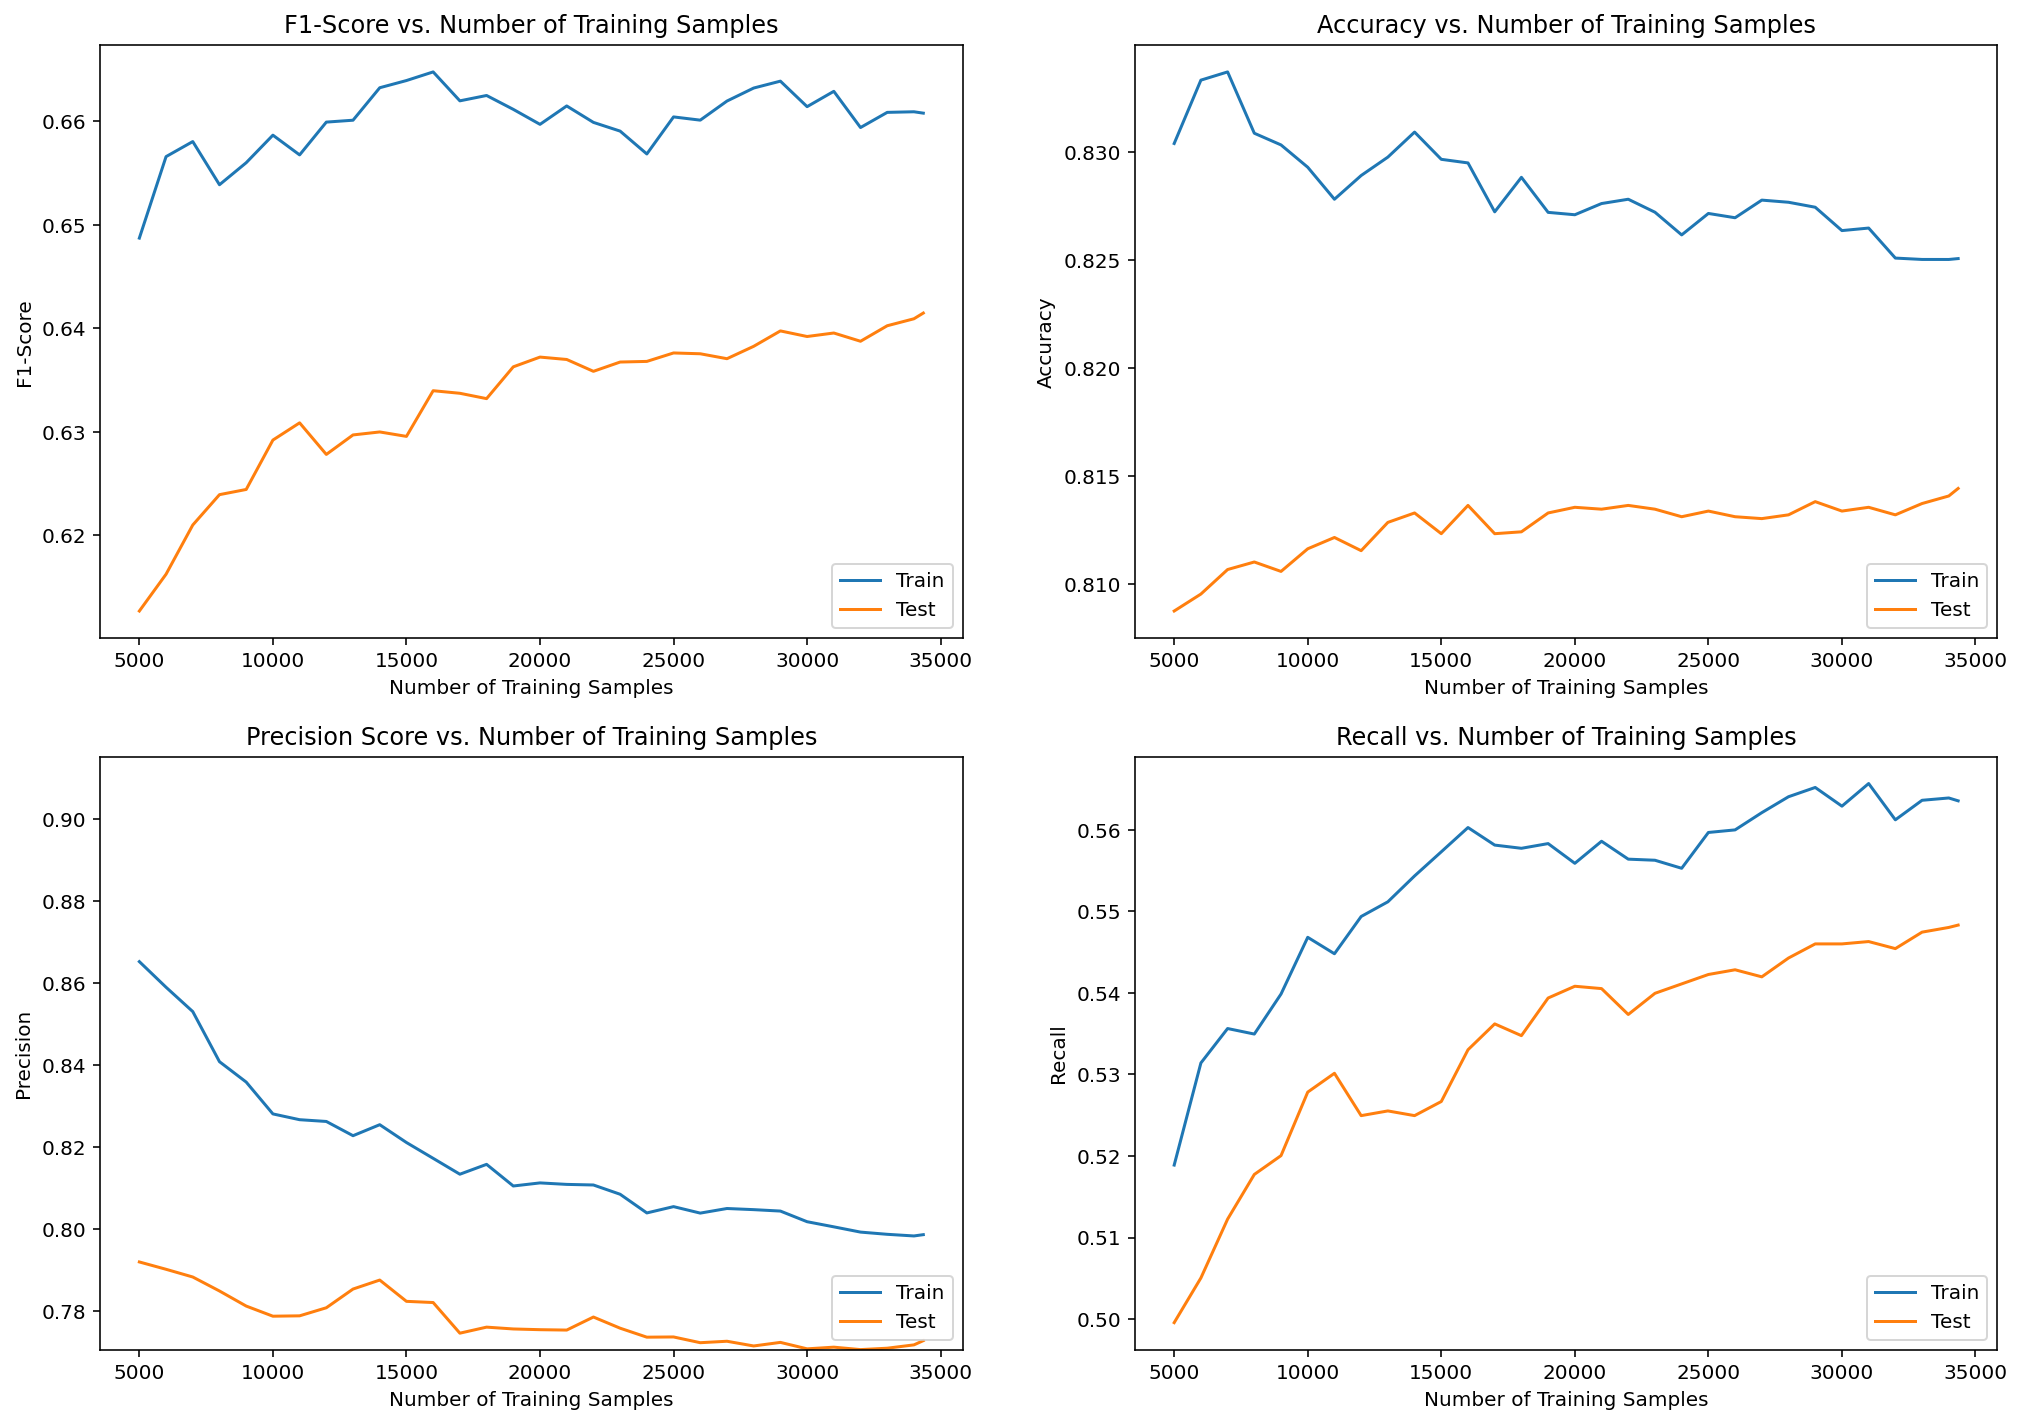

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(X_body_tfidf,y)

cv = cross_validation(lr_body, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

**Graphs above** show that the difference train and test curves are not that far apart, so using the "Body" of the dataset can be helpful

###Random Forest

Using Title column of the dataset

In [0]:
rcf_title = RandomForestClassifier(n_estimators=100,n_jobs=3)

In [0]:
rcf_title.fit(X_title_tfidf_train, y_title_train)
y_rc_title_pred = rcf_title.predict(X_title_tfidf_test)

In [0]:
print ("Random Forest F1 and Accuracy Scores for the 'Title' of the dataset : \n")
print ( "F1 score {:.4}%".format( f1_score(y_title_test, y_rc_title_pred, average='macro')*100 ) )
print ( "Accuracy  {:.4}%".format(accuracy_score(y_title_test, y_rc_title_pred)*100))

Random Forest F1 and Accuracy Scores for the 'Title' of the dataset : 

F1 score 64.46%
Accuracy  73.02%


In [0]:
cros_val_list = cross_val_score(rcf_title, X_title_tfidf,y,cv=5)
print (cros_val_list)

[0.27169523 0.71924462 0.77587336 0.72379913 0.75862445]


In [0]:
print(cros_val_list.mean())

0.6498473593918399


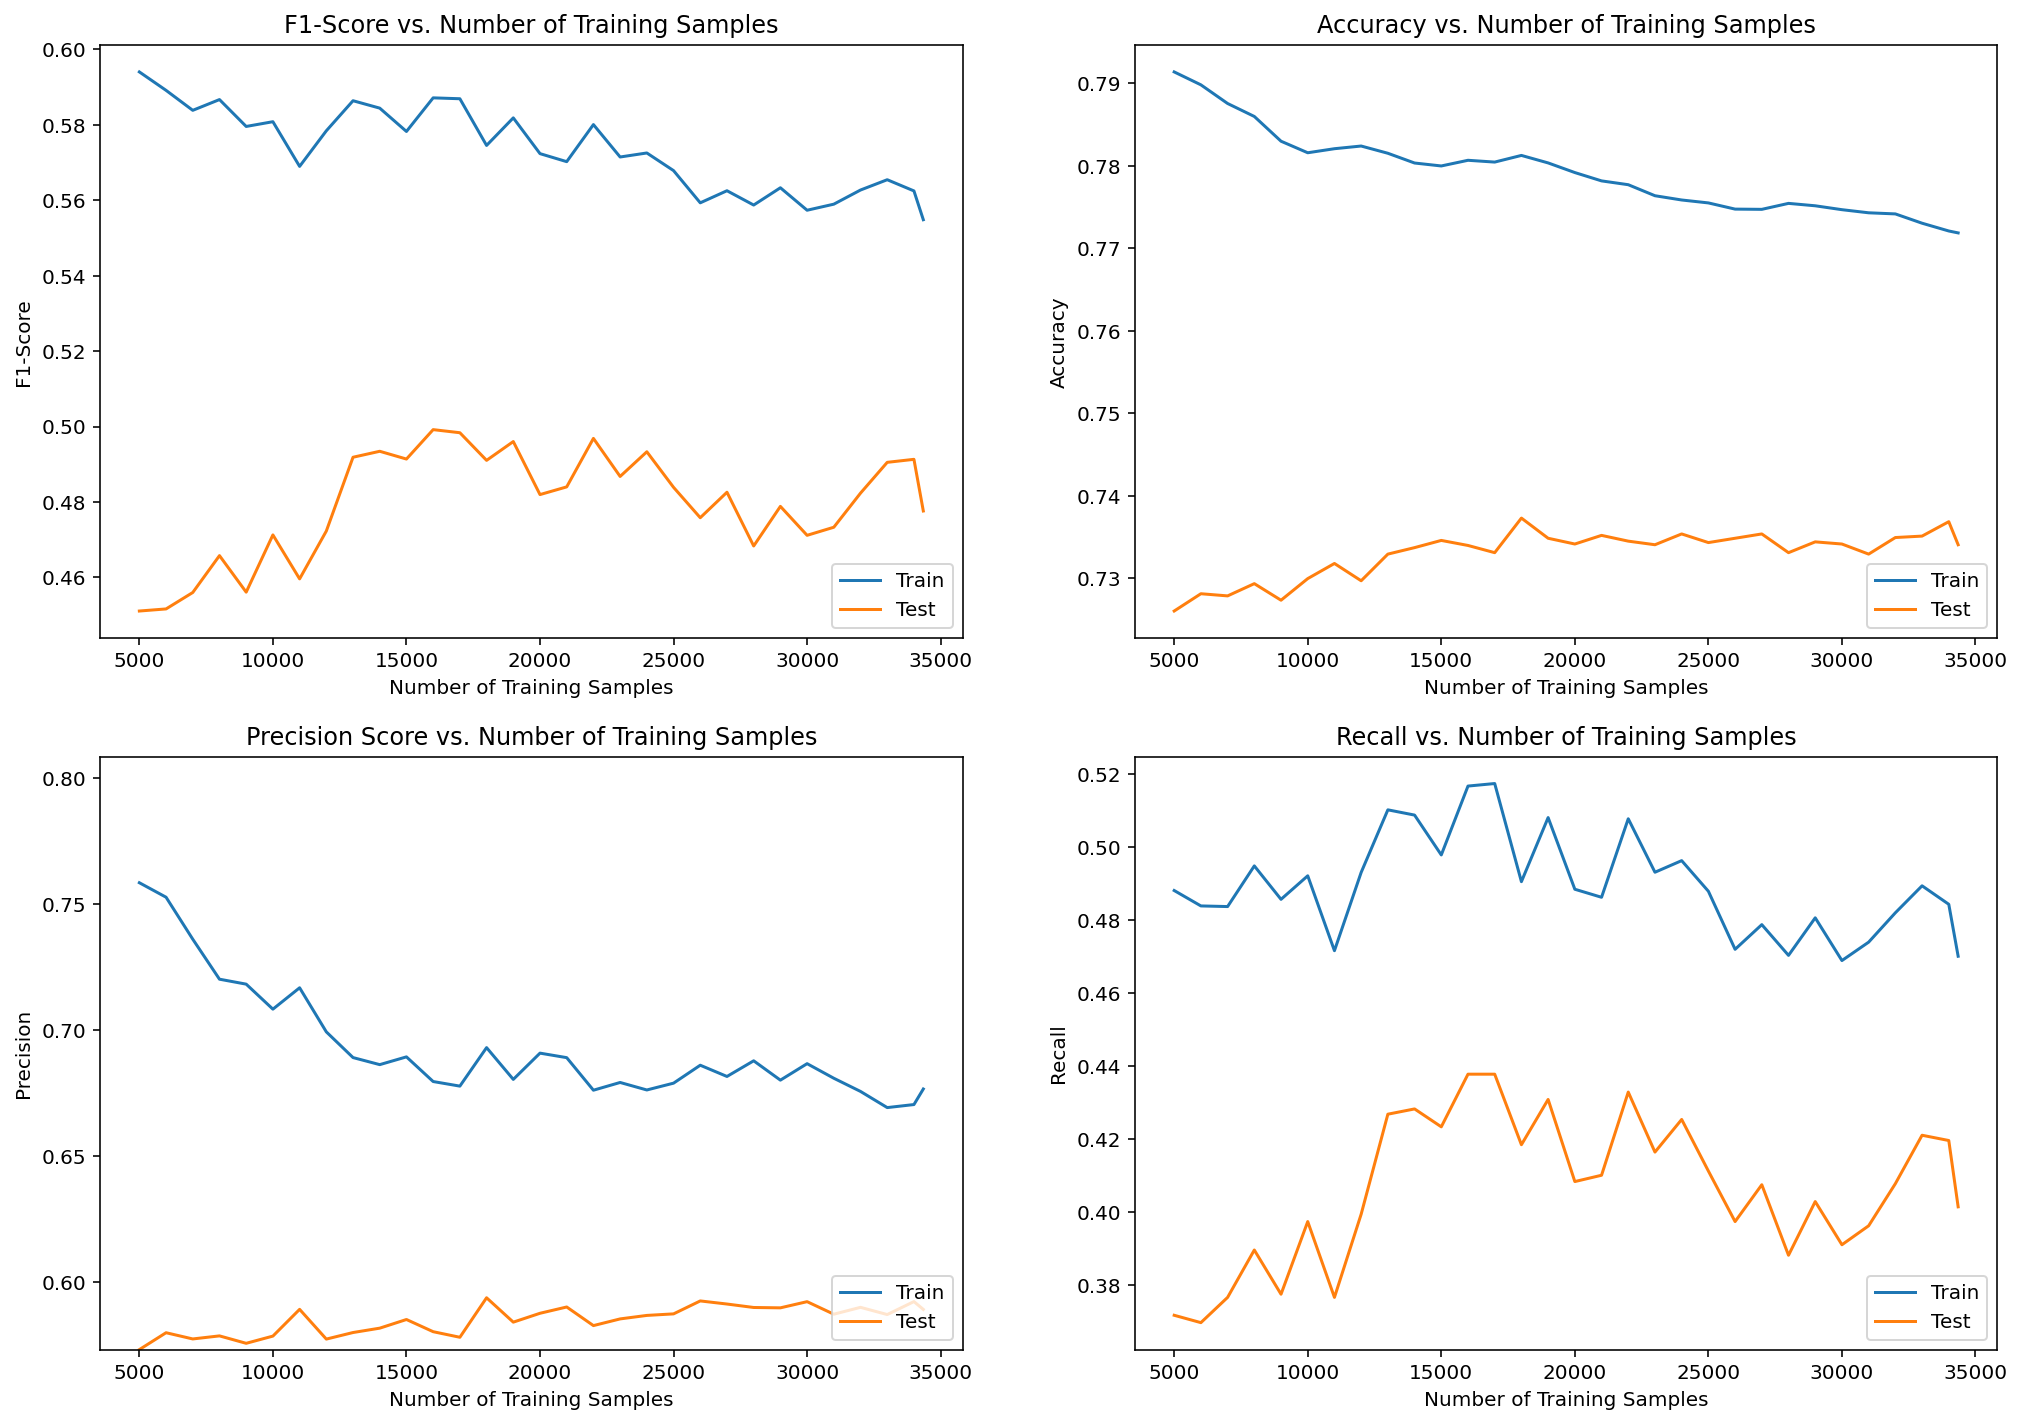

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(X_title_tfidf,y)

cv = cross_validation(rcf_title, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

**Graph above** shows the train and test lines are far apart when using Random forest

Using body from the dataset

In [0]:
rcf_body = RandomForestClassifier(n_estimators=100,n_jobs=3)

In [0]:
rcf_body.fit(X_body_tfidf_train, y_body_train)
y_rc_body_pred = rcf_body.predict(X_body_tfidf_test)

In [0]:
print ("Random Forest F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_body_test, y_rc_body_pred, average='macro')*100 ) )
print ( "Accuracy {:.4}%".format(accuracy_score(y_body_test, y_rc_body_pred)*100) )

Random Forest F1 and Accuracy Scores : 

F1 score 76.74%
Accuracy 82.23%


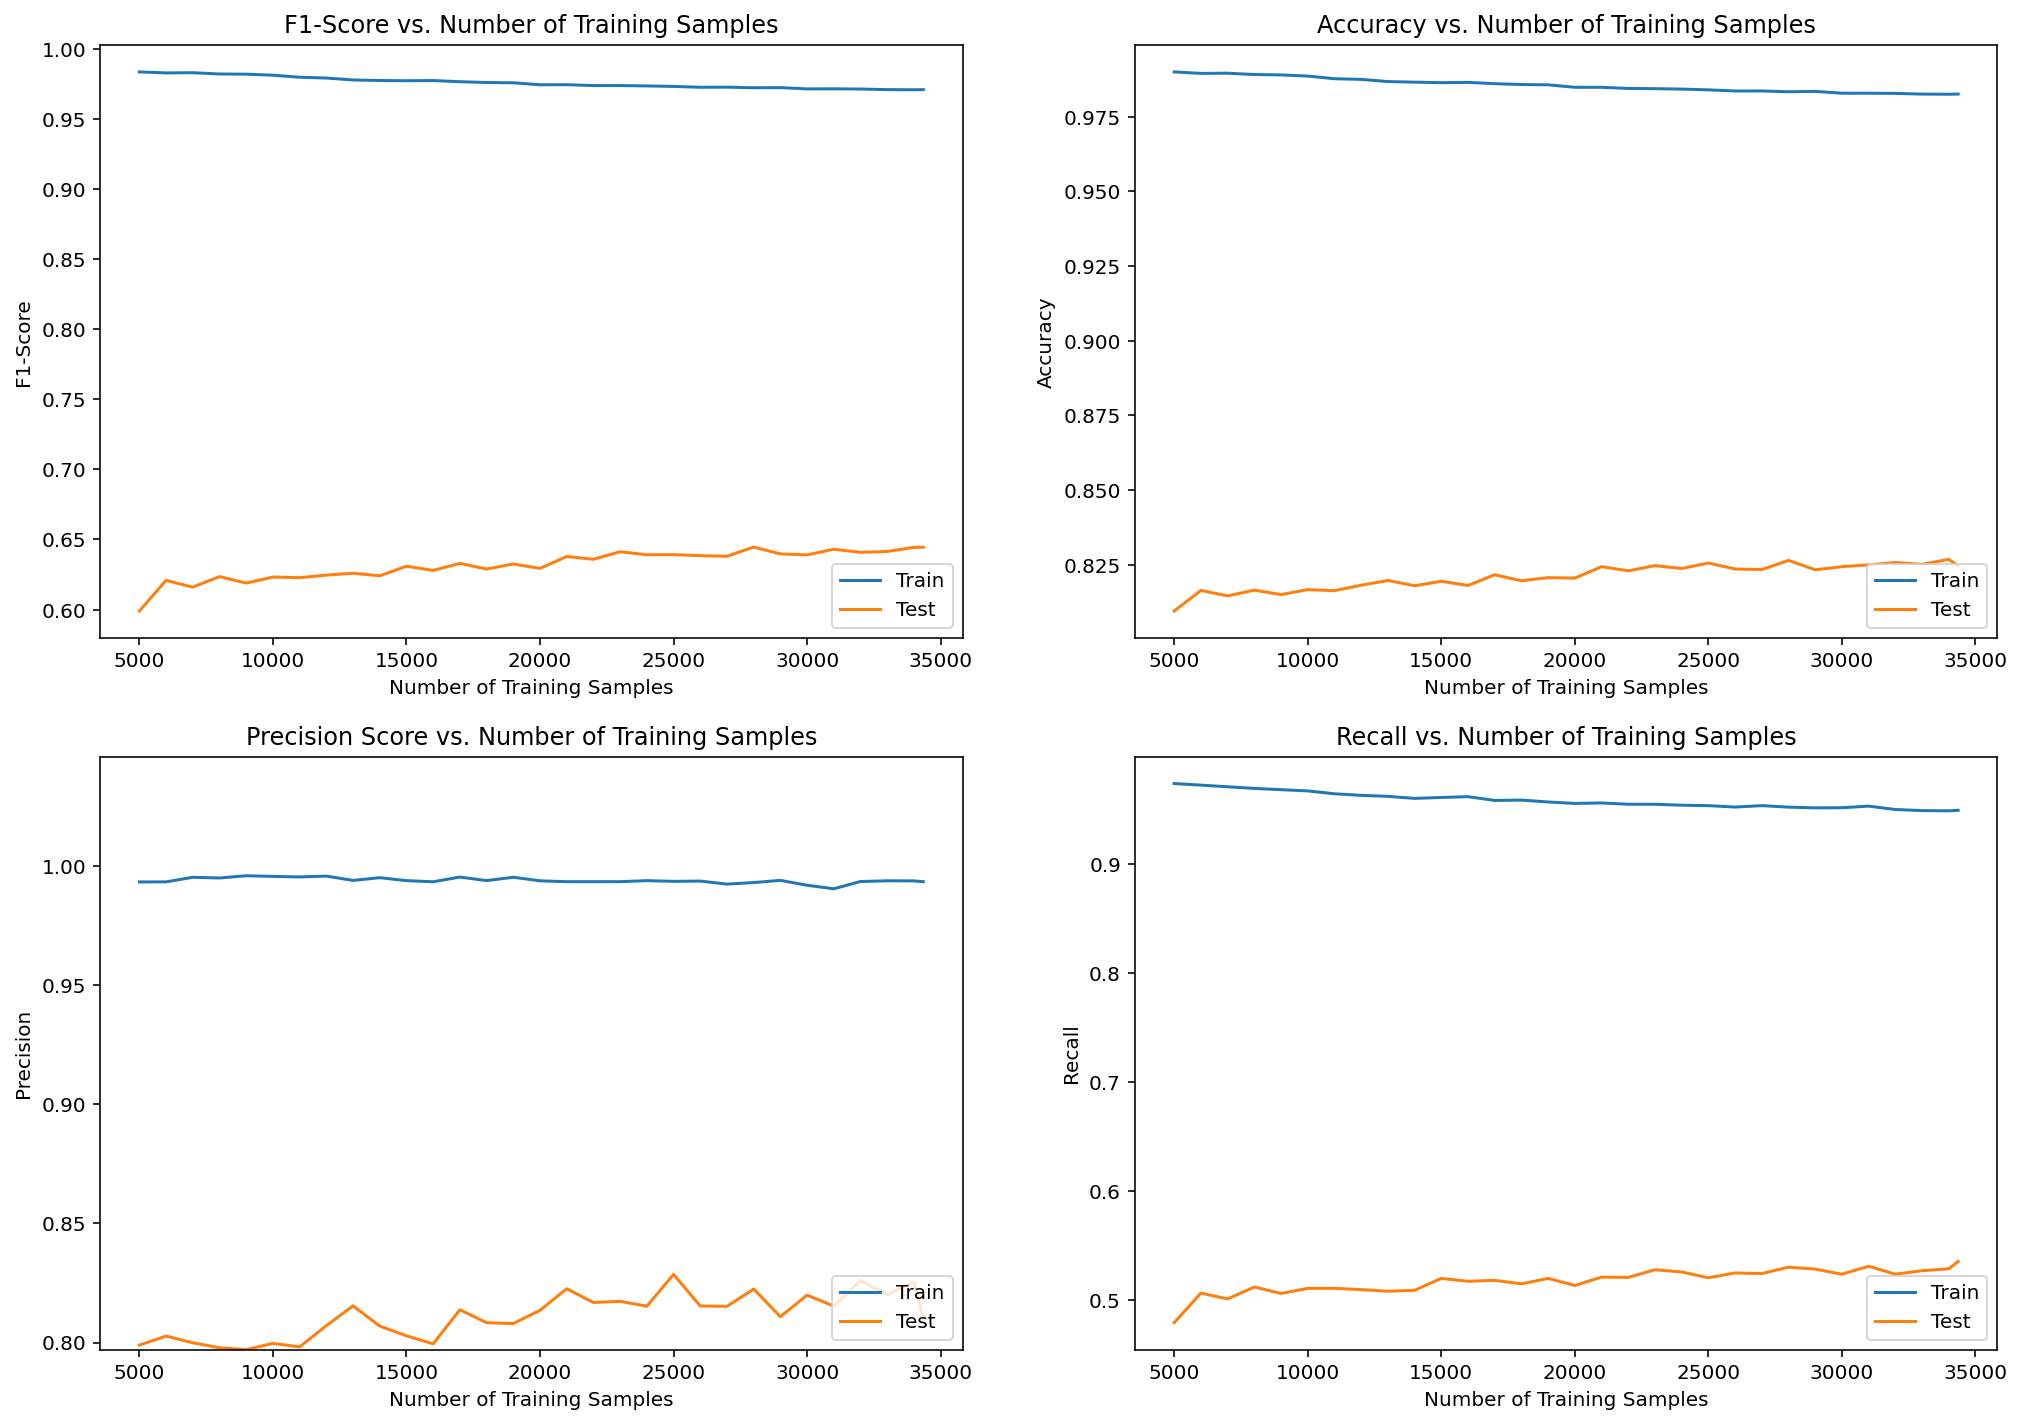

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(X_body_tfidf,y)

cv = cross_validation(rcf_body, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

**Graphs above** show, train and test curves are way too much apart from each other.

###XGBoost Classifier

Using title from the dataset

In [0]:
xgb_title = XGBClassifier()

In [0]:
xgb_title.fit(X_title_tfidf_train, y_title_train)
y_xgb_title_pred = xgb_title.predict(X_title_tfidf_test)

In [0]:
print ("XGBoost F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_title_test, y_xgb_title_pred, average='macro')*100 ) )
print ( "Accuracy  {:.4}%".format(accuracy_score(y_title_test, y_xgb_title_pred)*100) )

XGBoost F1 and Accuracy Scores : 

F1 score 54.04%
Accuracy  71.59%


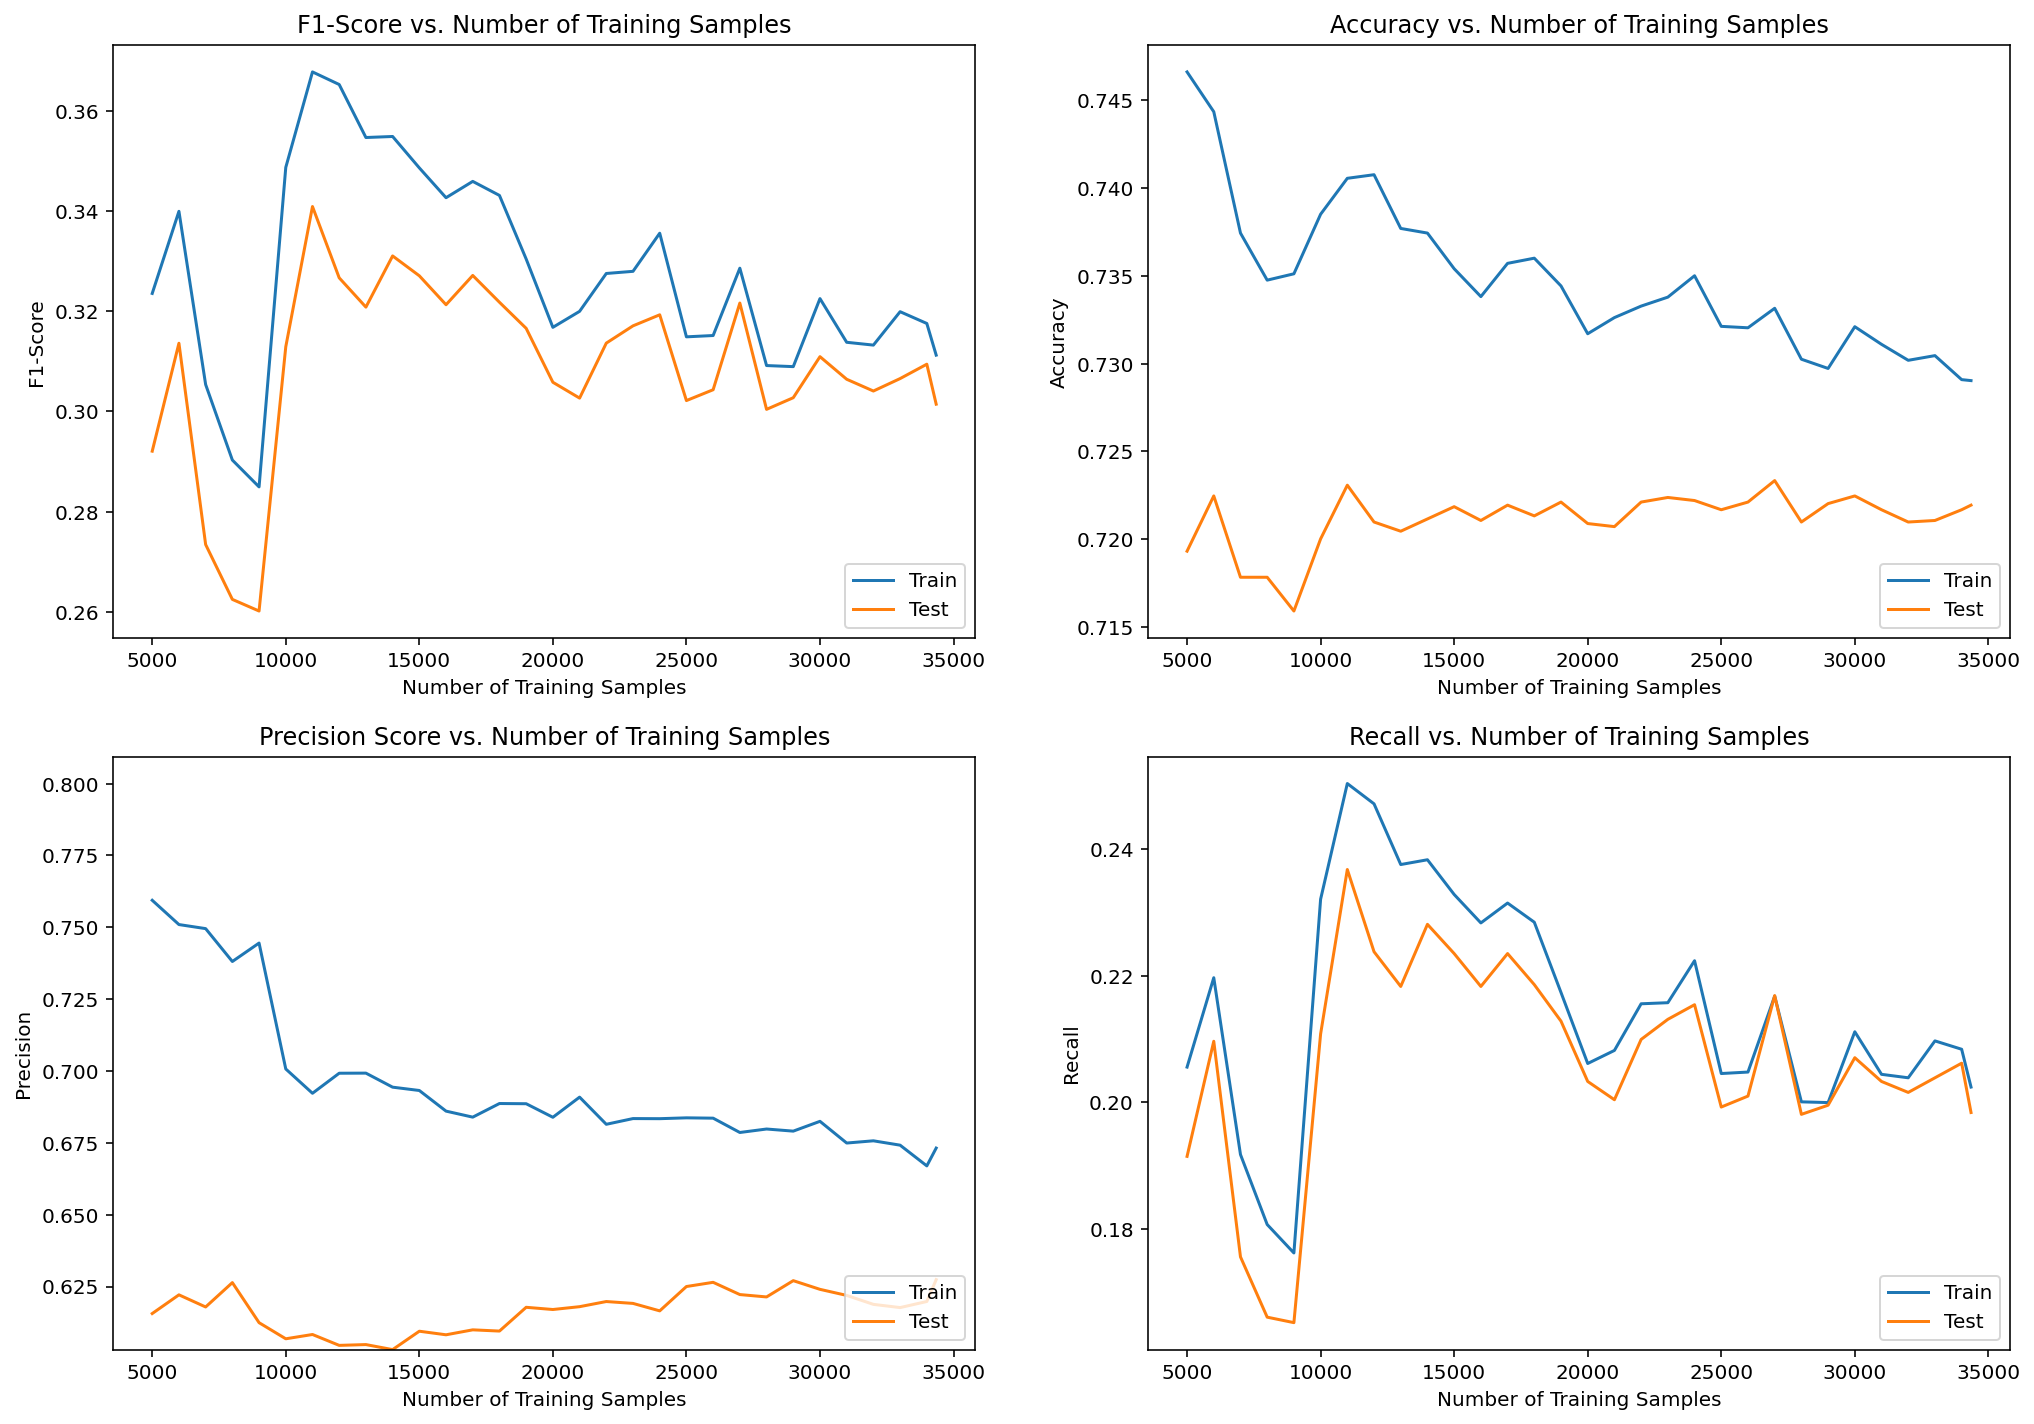

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(X_title_tfidf,y)

cv = cross_validation(xgb_title, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

**Graphs above** show, the train and test curve are close enough, and 'the title' of the news articles can be useful to classify news as Fake or Real

Using body from the dataset

In [0]:
xgb_body = XGBClassifier()

In [0]:
xgb_body.fit(X_body_tfidf_train, y_body_train)
y_xgb_body_pred = xgb_body.predict(X_body_tfidf_test)

In [0]:
print ("XGBoost F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%``".format( f1_score(y_body_test, y_xgb_body_pred, average='macro')*100 ) )
print ( "Accuracy  {:.4}%".format(accuracy_score(y_body_test, y_xgb_body_pred)*100) )

XGBoost F1 and Accuracy Scores : 

F1 score 74.08%``
Accuracy  81.73%


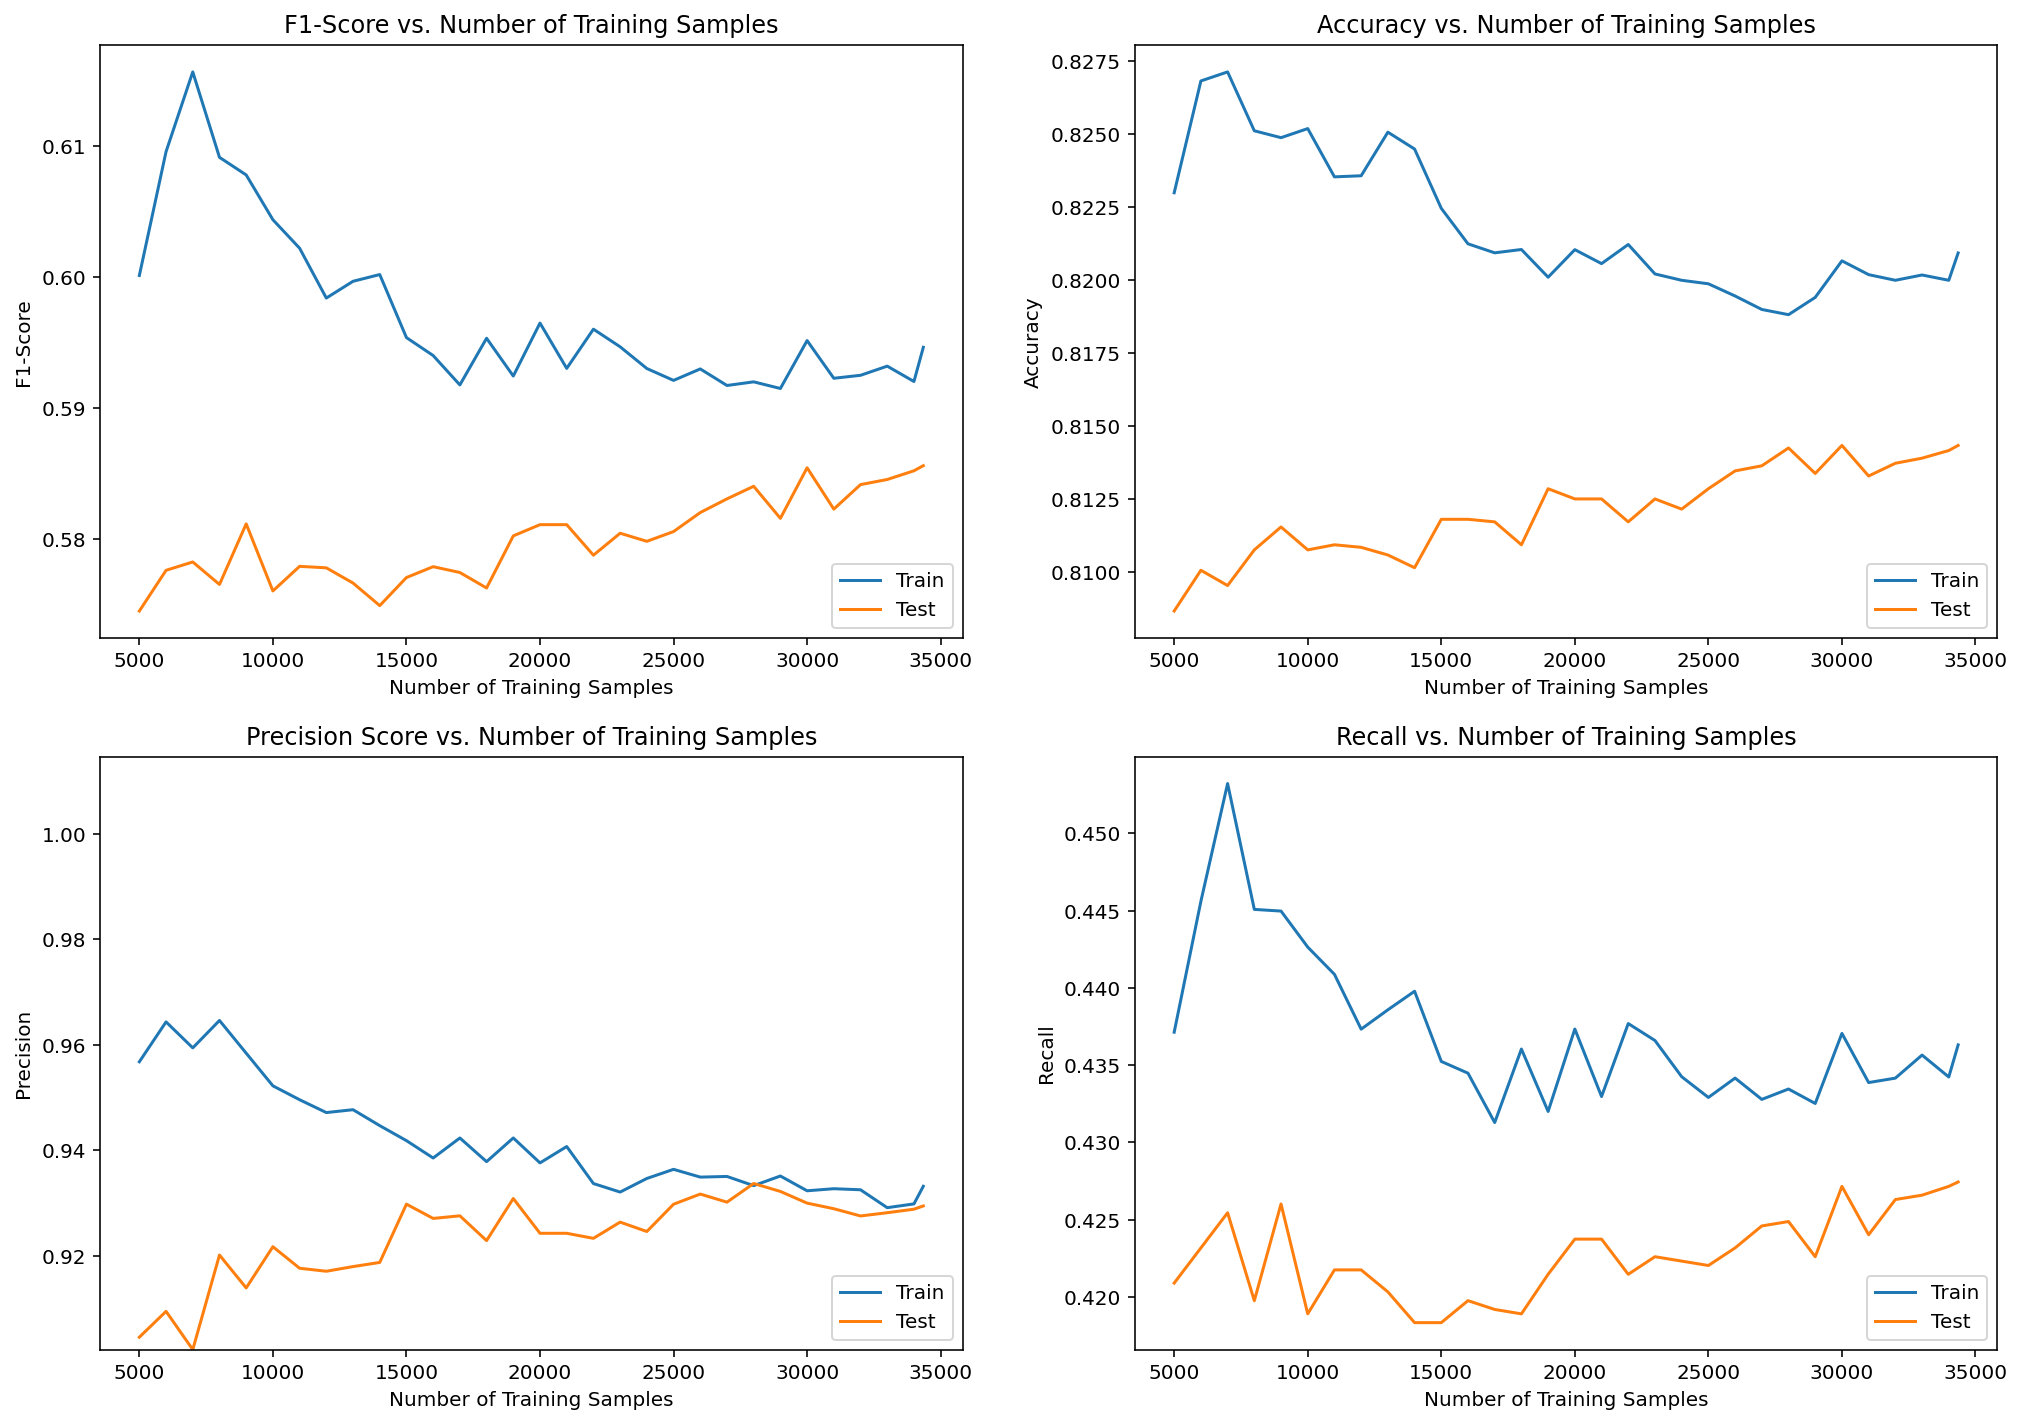

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(X_body_tfidf,y)

cv = cross_validation(xgb_body, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

**Graphs above** show, the train and test curve for XGBoost for 'Body' of the news articles are close to each other, which means using the 'body' of the news articles, can be helpful compared to 'title' of the news articles in predicting news as Fake or Real.

###From the results seen above, the Learning Curve for 'Body' of the articles were close enough for train and test dataset, compared to the 'title' of the articles. This means, the 'Body' factor of the article is better at predicting the Fake news compared to the 'Title' of the articles.

Using Logistic Regression, and performing grid search to improve the accuracy of the model.

In [0]:
ngram_range = [(1,1),(1,2),(1,3)]
max_df = [0.65,0.75,0.85,0.90]
min_df = [0.001,0.01]
penal = ['l2']

for penalt in penal:
    for gram in ngram_range:
        for mx_df in max_df:
            for mn_df in min_df:

                print ("For the parameters of \nmax_df=",mx_df,"min_df=",mn_df,"\nngram_range=",gram,"penalty as=",penalt)
                tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,
                                        ngram_range=gram,max_df=mx_df,min_df=mn_df)



                #X_body_tfidf = tfidf.fit_transform(X_body_text)
                X_title_tfidf = tfidf.fit_transform(X_title_text)

                X_title_train_tfidf, X_title_test_tfidf, y_title_train, y_title_test = train_test_split(X_title_tfidf,y, test_size = 0.2, random_state=1234)
                X_body_train_tfidf, X_body_test_tfidf, y_body_train, y_body_test = train_test_split(X_body_tfidf,y, test_size = 0.2, random_state=1234)

                lr = LogisticRegression(penalty=penalt,n_jobs=3)
                lr.fit(X_title_train_tfidf, y_title_train)
                y_pred = lr.predict(X_title_test_tfidf)

                print ("Logistig Regression F1 and Accuracy Scores : \n")
                print ( "F1 score {:.4}%".format( f1_score(y_title_test, y_pred, average='macro')*100 ) )
                print ( "Accuracy{:.4}%\n\n".format(accuracy_score(y_title_test, y_pred)*100) )

For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 72.8%
Accuracy77.37%


For the parameters of 
max_df= 0.65 min_df= 0.01 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 62.23%
Accuracy72.3%


For the parameters of 
max_df= 0.75 min_df= 0.001 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 72.8%
Accuracy77.37%


For the parameters of 
max_df= 0.75 min_df= 0.01 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 62.23%
Accuracy72.3%


For the parameters of 
max_df= 0.85 min_df= 0.001 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 72.8%
Accuracy77.37%


For the parameters of 
max_df= 0.85 min_df= 0.01 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 62.23%
Accuracy72.3%


For the param

In [0]:
ngram_range = [(1,1),(1,2),(1,3)]
max_df = [0.65,0.75,0.85,1.00]
min_df = [0.001,0.01,0.1,0.0]
penal = ['l2']
f1_sc_lst = []
acc_lst = []
for penalt in penal:
    for gram in ngram_range:
        for mx_df in max_df:
            for mn_df in min_df:

                print ("For the parameters of \nmax_df=",mx_df,"min_df=",mn_df,"\nngram_range=",gram,"penalty as=",penalt)
                tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,
                                        ngram_range=gram,max_df=mx_df,min_df=mn_df)



                X_body_tfidf = tfidf.fit_transform(X_body_text)
                #X_title_tfidf = tfidf.fit_transform(X_title_text)

                X_title_train_tfidf, X_title_test_tfidf, y_title_train, y_title_test = train_test_split(X_title_tfidf,y, test_size = 0.2, random_state=1234)
                X_body_train_tfidf, X_body_test_tfidf, y_body_train, y_body_test = train_test_split(X_body_tfidf,y, test_size = 0.2, random_state=1234)

                lr = LogisticRegression(penalty=penalt,n_jobs=3)
                lr.fit(X_body_train_tfidf, y_body_train)
                y_pred = lr.predict(X_body_test_tfidf)

                print ("Logistig Regression F1 and Accuracy Scores : \n")
                print ( "F1 score {:.4}%".format( f1_score(y_body_test, y_pred, average='macro')*100 ) )
                print ( "Accuracy  {:.4}%".format(accuracy_score(y_body_test, y_pred)*100) )
                
                f1_sc_lst.append(f1_score(y_body_test, y_pred, average='macro')*100)
                acc_lst.append(accuracy_score(y_body_test, y_pred)*100)


For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 78.01%
Accuracy  82.94%
For the parameters of 
max_df= 0.65 min_df= 0.01 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 76.22%
Accuracy  81.63%
For the parameters of 
max_df= 0.65 min_df= 0.1 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 62.73%
Accuracy  72.94%
For the parameters of 
max_df= 0.65 min_df= 0.0 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 76.91%
Accuracy  82.29%
For the parameters of 
max_df= 0.75 min_df= 0.001 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 78.01%
Accuracy  82.94%
For the parameters of 
max_df= 0.75 min_df= 0.01 
ngram_range= (1, 1) penalty as= l2
Logistig Regression F1 and Accuracy Scores : 

F1 score 76.22%
Accuracy  81.63%
For the pa

In [0]:
f1_sc_lst

[78.00707455971927,
 76.22317434276651,
 62.73454937962211,
 76.90646435022539,
 78.00707455971927,
 76.22317434276651,
 62.73454937962211,
 76.90646435022539,
 78.00707455971927,
 76.22317434276651,
 62.73454937962211,
 76.90646435022539,
 78.00707455971927,
 76.22317434276651,
 62.73454937962211,
 76.90646435022539,
 78.14292227078839,
 76.13000734016373,
 62.73454937962211,
 75.54234464218214,
 78.14292227078839,
 76.13000734016373,
 62.73454937962211,
 75.54234464218214,
 78.14292227078839,
 76.13000734016373,
 62.73454937962211,
 75.54234464218214,
 78.14292227078839,
 76.13000734016373,
 62.73454937962211,
 75.54234464218214,
 78.19914626494713,
 76.13000734016373,
 62.73454937962211,
 74.10510082283766,
 78.19914626494713,
 76.13000734016373,
 62.73454937962211,
 74.10510082283766,
 78.19914626494713,
 76.13000734016373,
 62.73454937962211,
 74.10510082283766,
 78.19914626494713,
 76.13000734016373,
 62.73454937962211,
 74.10510082283766]

In [0]:
acc_lst

[82.93854382709311,
 81.62864316122695,
 72.93963541098132,
 82.29450933304224,
 82.93854382709311,
 81.62864316122695,
 72.93963541098132,
 82.29450933304224,
 82.93854382709311,
 81.62864316122695,
 72.93963541098132,
 82.29450933304224,
 82.93854382709311,
 81.62864316122695,
 72.93963541098132,
 82.29450933304224,
 83.02587053815085,
 81.57406396681584,
 72.93963541098132,
 82.07619255539788,
 83.02587053815085,
 81.57406396681584,
 72.93963541098132,
 82.07619255539788,
 83.02587053815085,
 81.57406396681584,
 72.93963541098132,
 82.07619255539788,
 83.02587053815085,
 81.57406396681584,
 72.93963541098132,
 82.07619255539788,
 83.06953389367973,
 81.57406396681584,
 72.93963541098132,
 81.51948477240477,
 83.06953389367973,
 81.57406396681584,
 72.93963541098132,
 81.51948477240477,
 83.06953389367973,
 81.57406396681584,
 72.93963541098132,
 81.51948477240477,
 83.06953389367973,
 81.57406396681584,
 72.93963541098132,
 81.51948477240477]

From the Results above, we can see that the Accuracy for the 'body' of the article is around 83% and more compared to the 'Title'. 
Thus, we can say for the Factor, 'TitlevsBody', 'Body' is more useful in predicting the Fake news.